# KASPI BANK TASK 1 SOLUTION

Importing all needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
file_name = 'task1.xlsx'
xl = pd.ExcelFile(file_name)

In [3]:
TRAIN_SHEET = xl.parse('TRAIN')
TEST_SHEET = xl.parse('TEST')

In [4]:
print(TRAIN_SHEET.shape)
print(TEST_SHEET.shape)
print(TRAIN_SHEET.head(2))
print(TEST_SHEET.head(2))

(6000, 17)
(3249, 16)
   ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0   0     9     J     M     Y     1.0     0.0     2.0            3.0   
1   1    10     N     M     T     1.0     8.0     0.0            1.6   

    FUEL_TYPE    BODY_TYPE    TYPE_OF_DRIVE INTERIOR_TYPE TRANSM_TYPE  \
0  Бензин-Газ  Внедорожник    Полный привод          КОЖА        АКПП   
1      Бензин        Седан  Передний привод         ВЕЛЮР        МКПП   

       AUTO_CONDITION     AVG_COST  ESTIM_COST  
0  Удовлетворительное  5725925.926     4688000  
1  Удовлетворительное  2211538.462     1853000  
      ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0  10000    13     J     M     Z     1.0     6.0     6.0            2.0   
1  10001    10     J     T     M     1.0     6.0     4.0            2.4   

  FUEL_TYPE  BODY_TYPE    TYPE_OF_DRIVE INTERIOR_TYPE TRANSM_TYPE  \
0    Бензин    Минивэн  Передний привод         ВЕЛЮР        АКПП   
1    Бензин  Кроссовер    Полн

In [5]:
trainLength = len(TRAIN_SHEET['ID'])
testLength = len(TEST_SHEET['ID'])
print(trainLength)
print(testLength)

6000
3249


In [6]:
TEST_SHEET['ESTIM_COST'] = pd.Series(np.random.randn(testLength), index=TEST_SHEET.index)
print(TEST_SHEET.head(3))

      ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0  10000    13     J     M     Z     1.0     6.0     6.0            2.0   
1  10001    10     J     T     M     1.0     6.0     4.0            2.4   
2  10002     5     K     M     H     0.0     4.0     7.0            2.0   

    FUEL_TYPE  BODY_TYPE    TYPE_OF_DRIVE    INTERIOR_TYPE TRANSM_TYPE  \
0      Бензин    Минивэн  Передний привод            ВЕЛЮР        АКПП   
1      Бензин  Кроссовер    Полный привод            ВЕЛЮР        АКПП   
2  Бензин-Газ  Кроссовер    Полный привод  КОМБИНИРОВАННЫЙ        АКПП   

       AUTO_CONDITION     AVG_COST  ESTIM_COST  
0  Удовлетворительное  1734883.721   -1.007219  
1  Удовлетворительное  4315384.615    0.457525  
2  Удовлетворительное  5110810.811    0.601783  


In [7]:
MAIN_DATA = pd.concat([TRAIN_SHEET, TEST_SHEET], ignore_index=True)
print(MAIN_DATA.head())

   ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0   0     9     J     M     Y     1.0     0.0     2.0            3.0   
1   1    10     N     M     T     1.0     8.0     0.0            1.6   
2   2    17     W     A     U     8.0     9.0     7.0            2.4   
3   3     4     K     M     H     9.0     1.0     8.0            1.6   
4   4    17     J     A     4     4.0     3.0     1.0            3.0   

    FUEL_TYPE    BODY_TYPE    TYPE_OF_DRIVE INTERIOR_TYPE TRANSM_TYPE  \
0  Бензин-Газ  Внедорожник    Полный привод          КОЖА        АКПП   
1      Бензин        Седан  Передний привод         ВЕЛЮР        МКПП   
2      Бензин        Седан  Передний привод         ВЕЛЮР        АКПП   
3      Бензин        Седан  Передний привод         ВЕЛЮР        АКПП   
4      Бензин  Внедорожник    Полный привод          КОЖА        АКПП   

       AUTO_CONDITION     AVG_COST  ESTIM_COST  
0  Удовлетворительное  5725925.926   4688000.0  
1  Удовлетворительное  2211538

In [8]:
MAIN_DATA[MAIN_DATA.select_dtypes(['object']).columns] = MAIN_DATA.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_columns = MAIN_DATA.select_dtypes(['category']).columns
MAIN_DATA[cat_columns] = MAIN_DATA[cat_columns].apply(lambda x: x.cat.codes)
DATA = MAIN_DATA.fillna(MAIN_DATA.mean())

In [33]:
TRAIN_DATA = DATA[:(trainLength)]
TRAIN_DATA = TRAIN_DATA.drop('ID', axis = True)

TEST_DATA = DATA[trainLength:]
TEST_MAIN_DATA = TEST_DATA[["AVG_COST"]]

In [10]:
print(TRAIN_DATA.shape)
print(TEST_DATA.shape)
print(TRAIN_DATA.head(2))
print(TEST_DATA.head(2))

(6000, 16)
(3249, 17)
   YEAR  VIN_1  VIN_2  VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0     9     10     17     31     1.0     0.0     2.0            3.0   
1    10     14     17     26     1.0     8.0     0.0            1.6   

   FUEL_TYPE  BODY_TYPE  TYPE_OF_DRIVE  INTERIOR_TYPE  TRANSM_TYPE  \
0          1          0              2              1            0   
1          0          4              1              0            1   

   AUTO_CONDITION     AVG_COST  ESTIM_COST  
0               1  5725925.926   4688000.0  
1               1  2211538.462   1853000.0  
         ID  YEAR  VIN_1  VIN_2  VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
6000  10000    13     10     17     32     1.0     6.0     6.0            2.0   
6001  10001    10     10     23     20     1.0     6.0     4.0            2.4   

      FUEL_TYPE  BODY_TYPE  TYPE_OF_DRIVE  INTERIOR_TYPE  TRANSM_TYPE  \
6000          0          2              1              0            0   
6001          0          1  

In [19]:

X_train = TRAIN_DATA[["AVG_COST"]]
Y_train = TRAIN_DATA[["ESTIM_COST"]]
scaler = MinMaxScaler()
scaler.fit(X_train)
my_scaler = MinMaxScaler()
my_scaler.fit(Y_train)

print(X_train.shape)
print(Y_train.shape)

(6000, 1)
(6000, 1)


In [21]:
# X_norm_train = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
# Y_norm_train = (Y_train - Y_train.mean()) / (Y_train.max() - Y_train.min())
X_norm_train =  scaler.transform(X_train)
Y_norm_train = my_scaler.transform(Y_train)

In [16]:
from __future__ import print_function
from itertools import count

import torch
from torch import nn
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim

In [22]:
x_train = torch.FloatTensor(X_norm_train)
y_train = torch.FloatTensor(Y_norm_train)

In [23]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

In [24]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [25]:
num_epochs = 2300000
num_epochs = 3000000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100000 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

Epoch[100000/3000000], loss: 0.015623
Epoch[200000/3000000], loss: 0.010940
Epoch[300000/3000000], loss: 0.007679
Epoch[400000/3000000], loss: 0.005409
Epoch[500000/3000000], loss: 0.003828
Epoch[600000/3000000], loss: 0.002727
Epoch[700000/3000000], loss: 0.001960
Epoch[800000/3000000], loss: 0.001428
Epoch[900000/3000000], loss: 0.001056
Epoch[1000000/3000000], loss: 0.000797
Epoch[1100000/3000000], loss: 0.000617
Epoch[1200000/3000000], loss: 0.000492
Epoch[1300000/3000000], loss: 0.000404
Epoch[1400000/3000000], loss: 0.000344
Epoch[1500000/3000000], loss: 0.000302
Epoch[1600000/3000000], loss: 0.000271
Epoch[1700000/3000000], loss: 0.000252
Epoch[1800000/3000000], loss: 0.000238
Epoch[1900000/3000000], loss: 0.000226
Epoch[2000000/3000000], loss: 0.000221
Epoch[2100000/3000000], loss: 0.000216
Epoch[2200000/3000000], loss: 0.000213
Epoch[2300000/3000000], loss: 0.000209
Epoch[2400000/3000000], loss: 0.000207
Epoch[2500000/3000000], loss: 0.000206
Epoch[2600000/3000000], loss: 0.00

<type 'numpy.ndarray'>


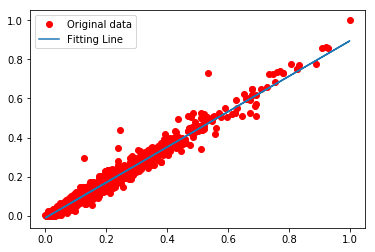

In [27]:
from mpl_toolkits.mplot3d import Axes3D
# model = LinearRegression()
# model.load_state_dict(torch.load('./linear2.pth'))
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
X = x_train.numpy()
print(type(X[:, 0]))
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_train.numpy()[:, 0], x_train.numpy()[:, 1], zs=y_train.numpy(), zdir='y',c = 'r')
# ax.scatter(x_train.numpy()[:, 0], x_train.numpy()[:, 1], zs=predict, zdir='y',c = 'b')
plt.legend() 
plt.show()

torch.save(model.state_dict(), './linear-1.pth')

Predicting all values

In [23]:
print(predict, y_train)

print(my_scaler.inverse_transform(predict))
print(my_scaler.inverse_transform(y_train))

[[0.1941803 ]
 [0.05404548]
 [0.01010506]
 ...
 [0.13170922]
 [0.15042716]
 [0.07486685]] 
 0.1784
 0.0516
 0.0134
   ⋮    
 0.1495
 0.1480
 0.0736
[torch.FloatTensor of size 6000x1]

[[5041677.5]
 [1908403. ]
 [ 925939. ]
 ...
 [3644886.5]
 [4063401. ]
 [2373947.8]]
[[4687999.88920987]
 [1853000.03330037]
 [1000000.00998285]
 ...
 [4042000.09579957]
 [4009999.96368587]
 [2345999.92386252]]


In [28]:
print(predict, y_train)

print(my_scaler.inverse_transform(predict))
print(my_scaler.inverse_transform(y_train))

[[0.19867902]
 [0.05439389]
 [0.01536801]
 ...
 [0.13673224]
 [0.15055093]
 [0.06946263]] 
 0.1784
 0.0516
 0.0134
   ⋮    
 0.1495
 0.1480
 0.0736
[torch.FloatTensor of size 6000x1]

[[5142264. ]
 [1916193.1]
 [1043613.3]
 ...
 [3757196.2]
 [4066168.5]
 [2253115. ]]
[[4687999.88920987]
 [1853000.03330037]
 [1000000.00998285]
 ...
 [4042000.09579957]
 [4009999.96368587]
 [2345999.92386252]]


Main Predicting of Estimated Cost

In [34]:
print(TEST_MAIN_DATA.shape)
test_data = scaler.transform(TEST_MAIN_DATA)
print(test_data.shape)

main_predict = model(Variable(torch.FloatTensor(test_data)))
predicted_test_data = main_predict.data.numpy()
out_data = my_scaler.inverse_transform(predicted_test_data)
print(out_data.shape)
print(out_data)

(3249, 1)
(3249, 1)
(3249, 1)
[[1478642.6]
 [3847442.2]
 [4577612.5]
 ...
 [1903561.4]
 [2642156. ]
 [3297842.5]]


In [36]:
print(type(out_data))
n = np.arange(10000, 13249).reshape(-1,1)
print(out_data.shape)
print(n.shape)
out = np.insert(out_data, 0, n[:, 0], axis=1)
print(out.shape)

<type 'numpy.ndarray'>
(3249, 1)
(3249, 1)
(3249, 2)


In [37]:
df = pd.DataFrame (out, columns=['ID','ESTIM_COST'])

filepath = 'output1.xlsx'

df.to_excel(filepath, index=False)